# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [88]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [89]:
# Initialize the Panel Extensions (for Plotly)
# import panel as pn
# pn.extension("plotly")

In [90]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [91]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [92]:
# Getting the data from the top 10 expensive neighbourhoods
top_10_neighbourhood = to_data.loc[:,['neighbourhood','average_house_value']].reset_index().groupby('neighbourhood').mean().drop(columns='year').sort_values('average_house_value', ascending = False)
# Calculate the mean number of dwelling types units per year
dwelling_type = to_data.loc[:, to_data.columns.drop(['neighbourhood', 'average_house_value','shelter_costs_owned', 'shelter_costs_rented'])]
total_by_dwelling = dwelling_type.groupby(level=0).sum()
# Calculate the average monthly shelter costs for owned and rented dwellings
mthly_shelter_costs = to_data.iloc[:,[10, 11]].copy()
avgmthly_shelter_costs = mthly_shelter_costs.groupby(level=0).mean()


### Panel Visualization Functions

In [93]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    avg_value_neighbourhood = to_data.loc[:,['neighbourhood','average_house_value']].groupby('neighbourhood').mean().reset_index()
    joined_data_avg_value = pd.concat([avg_value_neighbourhood, df_neighbourhood_locations], join='inner', axis=1).set_index('neighbourhood')
    map_neighbourhood_avg_values = px.scatter_mapbox(
                        joined_data_avg_value,
                        lat = 'lat',
                        lon = 'lon',
                        color = 'average_house_value',
                        title = 'Average House Values in Toronto')
    return map_neighbourhood_avg_values


def dwelling_types():
    """
    Create a barplot based in the data argument.
    """
    dwelling_types_data = to_data.drop(to_data.iloc[:, -3:], axis=1).copy()
    plot_dwelling_types = dwelling_types_data.hvplot(
       groupby='neighbourhood', 
       kind='bar', 
       rot=90, 
       height = 500, 
       ylabel='Dwelling Type Units', 
       xlabel = 'Year', 
       width = 600)
    return plot_dwelling_types

def cost_analysis():
    """
    Create a line chart based in the data argument.
    """
    avg_house_value_neighbourhood = to_data.loc[:,['neighbourhood','average_house_value']].copy().reset_index()
    plot_avg_house_values = px.bar(
        avg_house_value_neighbourhood, 
        x='neighbourhood', 
        y='average_house_value', 
        facet_row = 'year', 
        color = 'average_house_value', 
        height=1600)
    return plot_avg_house_values

def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    avg_house_value_neighbourhood = to_data.loc[:,['neighbourhood','average_house_value']].copy().reset_index()
    plot_avg_house_value = avg_house_value_neighbourhood.hvplot(
        x='year', 
        y='average_house_value', 
        groupby='neighbourhood', 
        kind='line', 
        xlabel = 'Year' , 
        ylabel = 'Avg. House Value')
    return plot_avg_house_value


def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""
    avg_house_value_data = to_data.loc[:,['average_house_value']].copy()
    avg_house_value = avg_house_value_data.groupby(level=0).mean()
    plot_avg_house_value = avg_house_value.plot.line().get_legend().remove()
    xlabel = plt.xlabel('Year', fontsize=12)
    ylabel = plt.ylabel('Avg. House Value', fontsize=12)
    title = plt.title('Average House Value in Toronto', fontsize=14, fontweight='bold')
    return plot_avg_house_value


def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    top_10_neighbourhood = to_data.loc[:,['neighbourhood','average_house_value']].reset_index().groupby('neighbourhood').mean().drop(columns='year').sort_values('average_house_value', ascending = False)
    plot_top_10_neighbourhood = top_10_neighbourhood.iloc[0:10].hvplot(
        title = 'Top 10 Expensive Neighbourhoods in Toronto', 
        kind='bar',
        xlabel = 'Neighbourhood', 
        ylabel = 'Avg. House Values', 
        rot = 45, 
        height = 400)
    return plot_top_10_neighbourhood

def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    cost_analysis_data = to_data.reset_index().sort_values('shelter_costs_owned',ascending = False).groupby('year').head(10)
    plot_cost_analysis = px.sunburst(
           cost_analysis_data, 
           path=['year','neighbourhood'], 
           values='shelter_costs_owned', 
           width = 700, height = 600,
           color='shelter_costs_owned', 
           hover_data=['shelter_costs_owned'],
           color_continuous_scale='RdBu_r')
    return plot_cost_analysis

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Column
    [0] Column
        [0] Column()
        [1] Row
            [0] HoloViews(Bars, name='interactive10572')
    [1] Column
        [0] Column()
        [1] Row
            [0] Str(None, name='interactive10654')

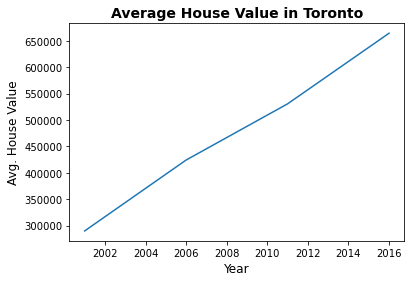

In [94]:
# Create column for cost of living charts
cost_of_living_charts = pn.Column(    
    top_most_expensive_neighbourhoods,
     average_house_value_snapshot
) 
cost_of_living_charts

In [95]:
# Create subtitle for tabs
subtitle2 = pn.pane.Markdown('##House Values and Dwelling Types by Neighbourhood', style={'color':'yellow','font-family':'serif'})

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ('Hse Value by Neighborhood', average_value_by_neighbourhood),
    ('Dwelling Types by Neighbourhood', dwelling_types)
)
tabs

Tabs
    [0] Column
        [0] Column()
        [1] Row
            [0] Row(name='interactive10733')
                [0] HoloViews(DynamicMap, name='interactive10733')
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
    [1] Column
        [0] Column()
        [1] Row
            [0] Row(name='interactive10768')
                [0] HoloViews(DynamicMap, name='interactive10768')
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()

In [109]:
# Create main dashboard
main_dash = pn.Column(
    pn.pane.Markdown('#Real Estate Analysis of Toronto (2001 - 2016)\r\n An Overview of House Values and Count by Neighbourhood', style={'color':'yellow','font-family':'serif'}),
    neighbourhood_map,
    subtitle2,
    tabs, 
    )
main_dash

Column
    [0] Markdown(str, style={'color': 'yellow', ...})
    [1] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive12693')
    [2] Markdown(str, style={'color': 'orange', ...})
    [3] Tabs
        [0] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive10733')
                    [0] HoloViews(DynamicMap, name='interactive10733')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
        [1] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive10768')
                    [0] HoloViews(DynamicMap, name='interactive10768')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()

In [97]:
# Create subtitle
subtitle2 = pn.pane.Markdown('##Ten Most Expensive Neighbourhood!\r(broken down by year and suburbs)', style={'color':'orange','font-family':'serif'})

# Create cost of living panel
cost_analysis_panel = pn.Column(
    pn.pane.Markdown('#Average House Value in Toronto (2001 - 2016)', style={'color':'orange','font-family':'serif'}),
    cost_of_living_charts,
    cost_analysis,
    subtitle2,
    sunburts_cost_analysis
    )
cost_analysis_panel

Column
    [0] Markdown(str, style={'color': 'orange', ...})
    [1] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive10572')
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(None, name='interactive10654')
    [2] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive12012')
    [3] Markdown(str, style={'color': 'orange', ...})
    [4] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive12018')

## Serve the Panel Dashboard

In [98]:
# Execute Panel dashboard using servable function
main_dash.servable()

Column
    [0] Markdown(str, style={'color': 'yellow', ...})
    [1] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive11475')
    [2] Markdown(str, style={'color': 'yellow', ...})
    [3] Tabs
        [0] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive10733')
                    [0] HoloViews(DynamicMap, name='interactive10733')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
        [1] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive10768')
                    [0] HoloViews(DynamicMap, name='interactive10768')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()

In [99]:
# Execute Cost Analysis Panel
cost_analysis_panel.servable()

Column
    [0] Markdown(str, style={'color': 'orange', ...})
    [1] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive10572')
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(None, name='interactive10654')
    [2] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive12012')
    [3] Markdown(str, style={'color': 'orange', ...})
    [4] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive12018')

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [100]:
# neighbourhood_map().show()

In [101]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [102]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [103]:
# average_house_value()

In [104]:
# average_value_by_neighbourhood()

In [105]:
# number_dwelling_types()

In [106]:
# average_house_value_snapshot()

In [107]:
# top_most_expensive_neighbourhoods()

In [108]:
# sunburts_cost_analysis()